[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/frhack/oli_ai/blob/main/notebooks/oli_ai_MNIST_neural_network.ipynb)

In [1]:
#installo modulo oli_ai
#!pip uninstall oli_ai --y
!pip install --upgrade --no-cache-dir oli_ai
!pip install networkx

In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from oli_ai.mnist_lib import *


activations = ['sigmoid', 'softmax', 'relu', 'tanh', 'linear']
losses = ['mean_squared_error', 'categorical_crossentropy', 'mean_absolute_error', 'kld', 'hinge']

# Caricamento e preprocessamento del dataset MNIST
(x_train_img, y_train_lbl), (x_test_img, y_test_lbl) = mnist.load_data()
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizzazione dei valori dei pixel tra 0 e 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Conversione delle etichette in one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
epochs = 1



/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7247 - loss: 0.0504 - val_accuracy: 0.9010 - val_loss: 0.0203
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9016 - loss: 0.0202 - val_accuracy: 0.9152 - val_loss: 0.0175
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9114 - loss: 0.0179 - val_accuracy: 0.9169 - val_loss: 0.0165
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9115 - loss: 0.0171 - val_accuracy: 0.9202 - val_loss: 0.0158
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9185 - loss: 0.0163 - val_accuracy: 0.9207 - val_loss: 0.0157
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9208 - loss: 0.0157 - val_accuracy: 0.9227 - val_loss: 0.0152
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9230 - loss: 0.0154 - val_accuracy: 0.9230 - val_loss: 0.0150
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9222 - loss: 0.0154 - 

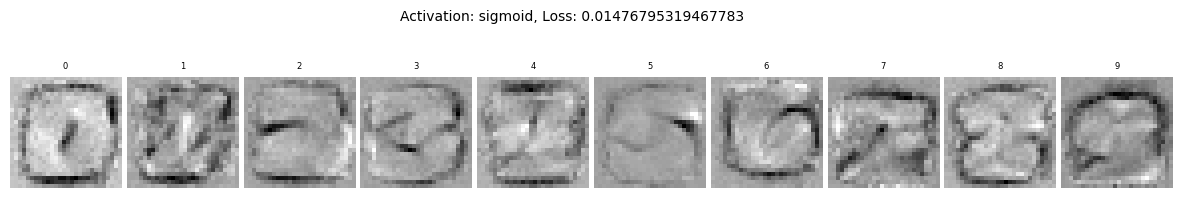

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Raw prediction: [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
7
7


In [3]:
epochs = 10
loss = 'mean_squared_error'
activation='sigmoid'





# Creazione del modello
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Appiattimento delle immagini in vettori di lunghezza 784
    Dense(10, activation)  # Strato di output con 10 neuroni (uno per classe) e attivazione sigmoide
])

# Compilazione del modello
model.compile(
    optimizer='adam',  # Ottimizzatore
    loss=loss,  # Funzione di perdita MSE
    metrics=['accuracy']  # Metriche di valutazione
)

# Addestramento del modello
model.fit(
    x_train, y_train,
    epochs=epochs,  # Numero di epoche
    batch_size=32,  # Dimensione del batch
    validation_data=(x_test, y_test)  # Dati di validazione
)

# Valutazione del modello
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

# Salvataggio del modello addestrato
#model.save('mnist_simple_model.h5')

# Visualizzazione dei pesi come immagini MNIST
weights = model.layers[1].get_weights()[0]  # Pes weights dello strato Dense
visualize_weights(weights, title=f"Activation: {activation}, Loss: {loss}")

image = x_test_img[0]  # Prima immagine
image = image.reshape(1, 28, 28)  # Aggiungi dimensione batch
prediction = model.predict(image)
print(f"Raw prediction: {prediction}")  # [0.01, 0.02, 0.95, 0.01, ...]

# Classe predetta
predicted_class = np.argmax(prediction)
print(predicted_class)
print(y_test_lbl[0])





In [5]:
print(predict(model,x_test_img[14]))

print(y_test_lbl[14])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1
1






Training with activation=sigmoid, loss=mean_squared_error
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7038 - loss: 0.0529 - val_accuracy: 0.9030 - val_loss: 0.0206
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8987 - loss: 0.0206 - val_accuracy: 0.9140 - val_loss: 0.0177
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9122 - loss: 0.0179 - val_accuracy: 0.9168 - val_loss: 0.0166
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9123 - loss: 0.0172 - val_accuracy: 0.9204 - val_loss: 0.0160
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9195 - loss: 0.0161 - val_accuracy: 0.9211 - val_loss: 0.0155
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9189 - loss: 0.0159 - val_accuracy: 0.9240 - val_loss: 0.0152
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9227 - loss: 0.0154 - val_accuracy: 0.9238 - val_loss: 0.0150
Epoch 8/10
1875/1875 ━━━━━━━

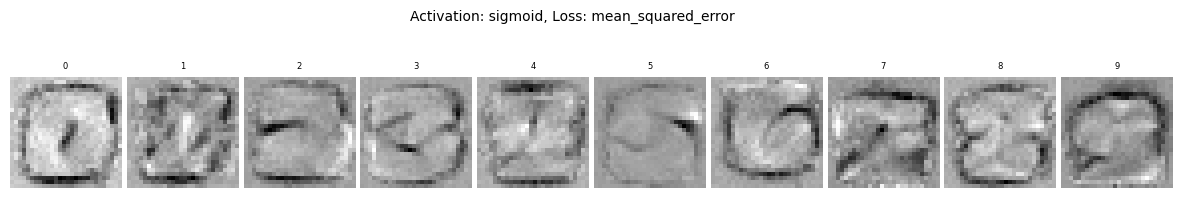





Training with activation=sigmoid, loss=categorical_crossentropy
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8095 - loss: 0.7188 - val_accuracy: 0.9132 - val_loss: 0.3094
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9137 - loss: 0.3122 - val_accuracy: 0.9233 - val_loss: 0.2817
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9202 - loss: 0.2892 - val_accuracy: 0.9250 - val_loss: 0.2725
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9218 - loss: 0.2814 - val_accuracy: 0.9267 - val_loss: 0.2683
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9238 - loss: 0.2708 - val_accuracy: 0.9259 - val_loss: 0.2640
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9274 - loss: 0.2583 - val_accuracy: 0.9282 - val_loss: 0.2650
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9287 - loss: 0.2553 - val_accuracy: 0.9236 - val_loss: 0.2666
Epoch 8/10
1875/1875 ━

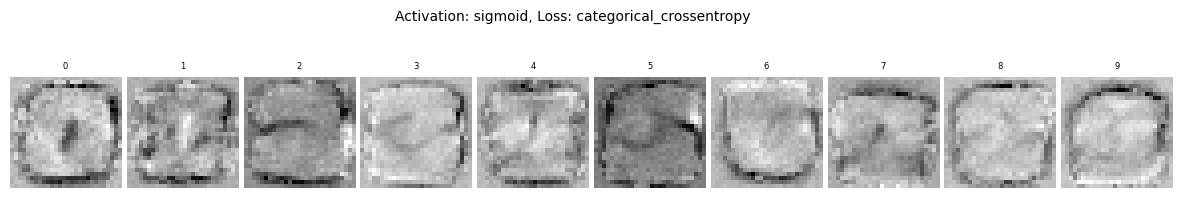





Training with activation=sigmoid, loss=mean_absolute_error
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1819 - loss: 0.1211 - val_accuracy: 0.2142 - val_loss: 0.0848
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2409 - loss: 0.0834 - val_accuracy: 0.2664 - val_loss: 0.0818
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2768 - loss: 0.0819 - val_accuracy: 0.2866 - val_loss: 0.0812
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3028 - loss: 0.0796 - val_accuracy: 0.3070 - val_loss: 0.0762
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3138 - loss: 0.0760 - val_accuracy: 0.3098 - val_loss: 0.0753
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3163 - loss: 0.0752 - val_accuracy: 0.3093 - val_loss: 0.0750
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3090 - loss: 0.0754 - val_accuracy: 0.3096 - val_loss: 0.0747
Epoch 8/10
1875/1875 ━━━━━━

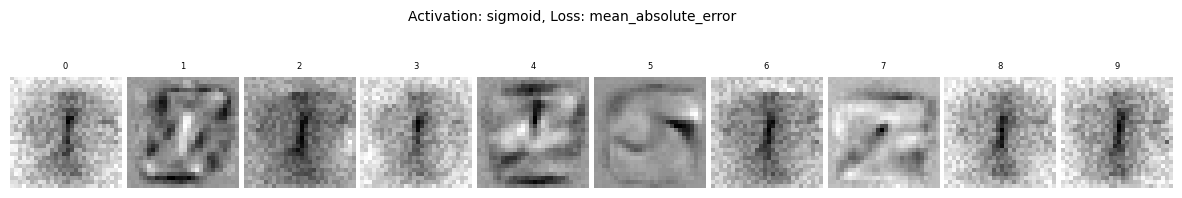





Training with activation=sigmoid, loss=kld
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3138 - loss: 0.0485 - val_accuracy: 0.3251 - val_loss: 6.1515e-04
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3102 - loss: 4.6895e-04 - val_accuracy: 0.3062 - val_loss: 1.5868e-04
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3018 - loss: 1.2704e-04 - val_accuracy: 0.3003 - val_loss: 5.0927e-05
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3005 - loss: 3.7933e-05 - val_accuracy: 0.2964 - val_loss: 1.3023e-05
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3041 - loss: 7.0771e-06 - val_accuracy: 0.2881 - val_loss: -2.2958e-06
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.2885 - loss: -5.2567e-06 - val_accuracy: 0.2797 - val_loss: -8.9664e-06
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2815 - loss: -1.0946e-05 - val_accuracy: 0.2688 - val_loss

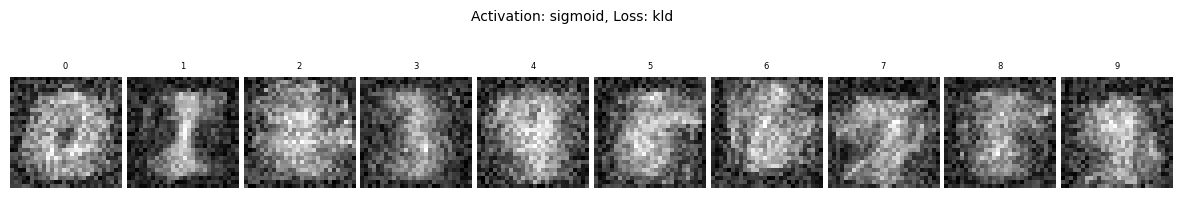





Training with activation=sigmoid, loss=hinge
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1663 - loss: 1.0203 - val_accuracy: 0.2195 - val_loss: 0.9838
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2357 - loss: 0.9833 - val_accuracy: 0.2578 - val_loss: 0.9819
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2609 - loss: 0.9819 - val_accuracy: 0.2676 - val_loss: 0.9813
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2750 - loss: 0.9814 - val_accuracy: 0.3047 - val_loss: 0.9770
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3122 - loss: 0.9766 - val_accuracy: 0.3123 - val_loss: 0.9755
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3572 - loss: 0.9726 - val_accuracy: 0.3888 - val_loss: 0.9679
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.3856 - loss: 0.9684 - val_accuracy: 0.3900 - val_loss: 0.9674
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━

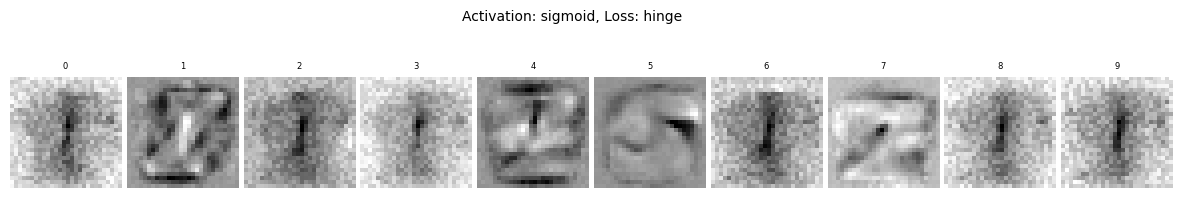





Training with activation=softmax, loss=mean_squared_error
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8138 - loss: 0.0298 - val_accuracy: 0.9192 - val_loss: 0.0129
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9160 - loss: 0.0134 - val_accuracy: 0.9251 - val_loss: 0.0117
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9233 - loss: 0.0120 - val_accuracy: 0.9275 - val_loss: 0.0114
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9295 - loss: 0.0112 - val_accuracy: 0.9269 - val_loss: 0.0113
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9298 - loss: 0.0111 - val_accuracy: 0.9284 - val_loss: 0.0110
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9343 - loss: 0.0105 - val_accuracy: 0.9322 - val_loss: 0.0107
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9348 - loss: 0.0104 - val_accuracy: 0.9328 - val_loss: 0.0106
Epoch 8/10
1875/1875 ━━━━━━━

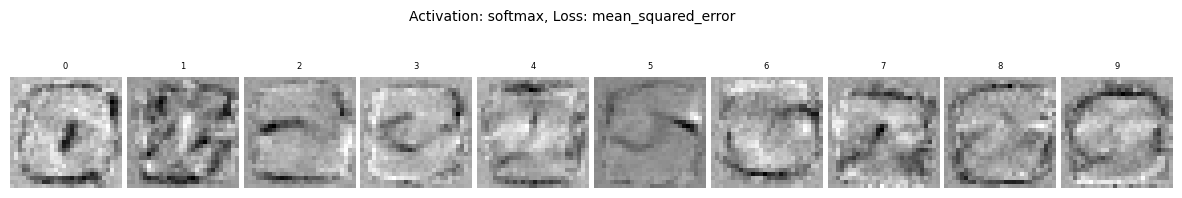





Training with activation=softmax, loss=categorical_crossentropy
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8159 - loss: 0.7156 - val_accuracy: 0.9168 - val_loss: 0.3053
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9126 - loss: 0.3094 - val_accuracy: 0.9230 - val_loss: 0.2821
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9206 - loss: 0.2857 - val_accuracy: 0.9227 - val_loss: 0.2770
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9256 - loss: 0.2701 - val_accuracy: 0.9239 - val_loss: 0.2704
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9250 - loss: 0.2725 - val_accuracy: 0.9256 - val_loss: 0.2669
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9269 - loss: 0.2601 - val_accuracy: 0.9261 - val_loss: 0.2619
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9291 - loss: 0.2549 - val_accuracy: 0.9271 - val_loss: 0.2648
Epoch 8/10
1875/1875 ━

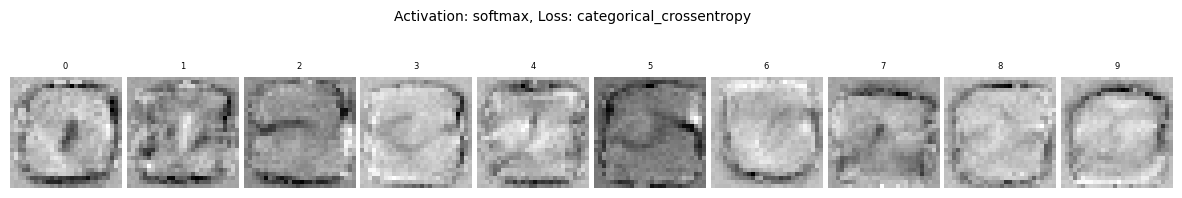





Training with activation=softmax, loss=mean_absolute_error
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7836 - loss: 0.0651 - val_accuracy: 0.9099 - val_loss: 0.0238
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9096 - loss: 0.0237 - val_accuracy: 0.9206 - val_loss: 0.0200
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9175 - loss: 0.0203 - val_accuracy: 0.9235 - val_loss: 0.0185
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9230 - loss: 0.0185 - val_accuracy: 0.9255 - val_loss: 0.0175
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9230 - loss: 0.0180 - val_accuracy: 0.9288 - val_loss: 0.0168
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9282 - loss: 0.0169 - val_accuracy: 0.9283 - val_loss: 0.0165
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9286 - loss: 0.0167 - val_accuracy: 0.9299 - val_loss: 0.0162
Epoch 8/10
1875/1875 ━━━━━━

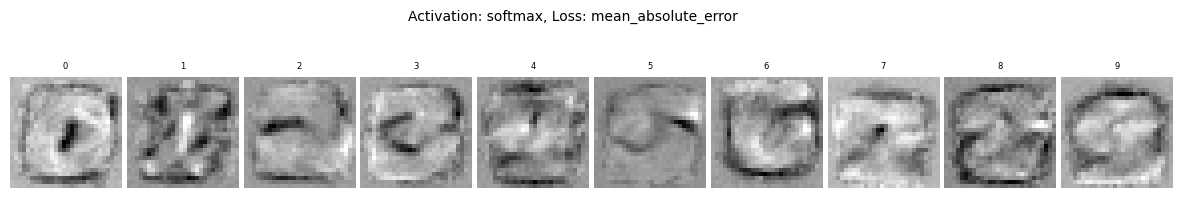





Training with activation=softmax, loss=kld
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8089 - loss: 0.7276 - val_accuracy: 0.9166 - val_loss: 0.3070
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9123 - loss: 0.3159 - val_accuracy: 0.9226 - val_loss: 0.2826
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9198 - loss: 0.2872 - val_accuracy: 0.9266 - val_loss: 0.2718
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9232 - loss: 0.2720 - val_accuracy: 0.9243 - val_loss: 0.2680
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9243 - loss: 0.2667 - val_accuracy: 0.9248 - val_loss: 0.2685
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9265 - loss: 0.2648 - val_accuracy: 0.9255 - val_loss: 0.2670
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9292 - loss: 0.2577 - val_accuracy: 0.9259 - val_loss: 0.2679
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5

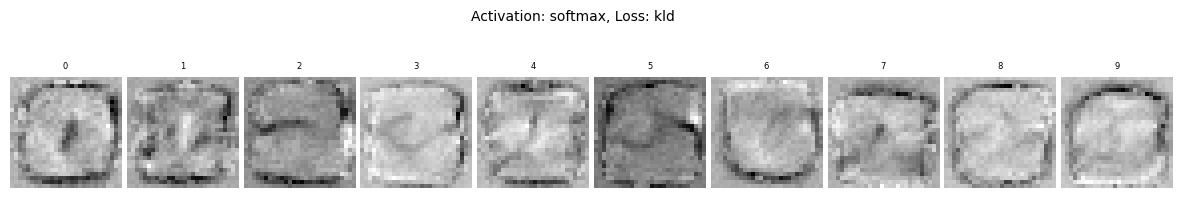





Training with activation=softmax, loss=hinge
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7769 - loss: 0.9656 - val_accuracy: 0.9076 - val_loss: 0.9240
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9072 - loss: 0.9242 - val_accuracy: 0.9187 - val_loss: 0.9201
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9197 - loss: 0.9200 - val_accuracy: 0.9227 - val_loss: 0.9185
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9229 - loss: 0.9187 - val_accuracy: 0.9248 - val_loss: 0.9175
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9267 - loss: 0.9176 - val_accuracy: 0.9284 - val_loss: 0.9167
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9300 - loss: 0.9168 - val_accuracy: 0.9279 - val_loss: 0.9165
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9319 - loss: 0.9161 - val_accuracy: 0.9293 - val_loss: 0.9161
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━

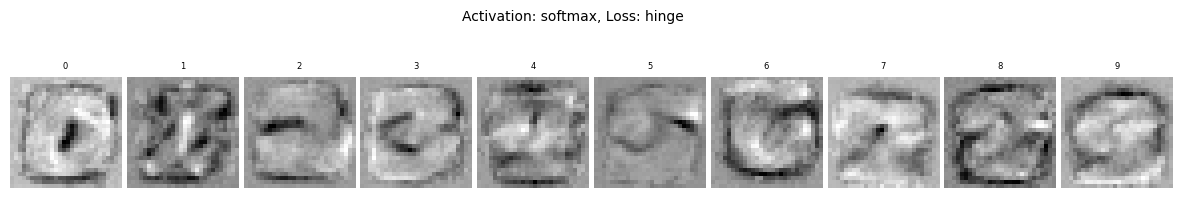





Training with activation=relu, loss=mean_squared_error
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6964 - loss: 0.0489 - val_accuracy: 0.8190 - val_loss: 0.0354
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8172 - loss: 0.0351 - val_accuracy: 0.8264 - val_loss: 0.0342
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8188 - loss: 0.0348 - val_accuracy: 0.8264 - val_loss: 0.0347
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8199 - loss: 0.0347 - val_accuracy: 0.8221 - val_loss: 0.0342
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8242 - loss: 0.0343 - val_accuracy: 0.8198 - val_loss: 0.0342
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8221 - loss: 0.0342 - val_accuracy: 0.8232 - val_loss: 0.0339
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8283 - loss: 0.0336 - val_accuracy: 0.8261 - val_loss: 0.0342
Epoch 8/10
1875/1875 ━━━━━━━━━━

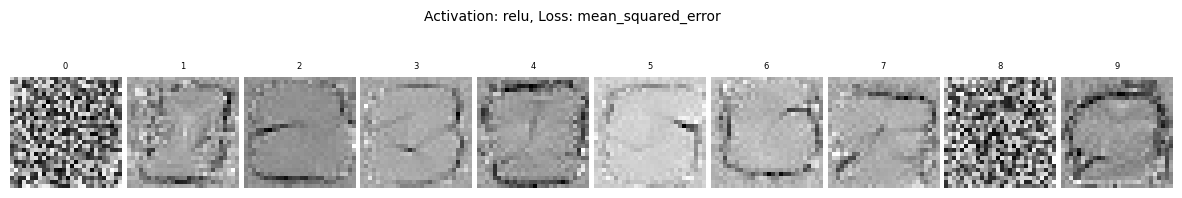





Training with activation=relu, loss=categorical_crossentropy
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1539 - loss: nan - val_accuracy: 0.0980 - val_loss: nan
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0985 - loss: nan - val_accuracy: 0.0980 - val_loss: nan
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0981 - loss: nan - val_accuracy: 0.0980 - val_loss: nan
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.1002 - loss: nan - val_accuracy: 0.0980 - val_loss: nan
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1000 - loss: nan - val_accuracy: 0.0980 - val_loss: nan
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0974 - loss: nan - val_accuracy: 0.0980 - val_loss: nan
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0998 - loss: nan - val_accuracy: 0.0980 - val_loss: nan
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0

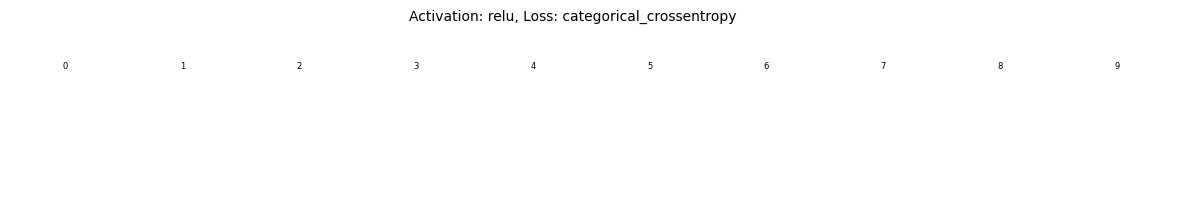





Training with activation=relu, loss=mean_absolute_error
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3382 - loss: 0.0872 - val_accuracy: 0.4444 - val_loss: 0.0764
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4484 - loss: 0.0761 - val_accuracy: 0.4477 - val_loss: 0.0754
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4513 - loss: 0.0750 - val_accuracy: 0.4470 - val_loss: 0.0746
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4474 - loss: 0.0746 - val_accuracy: 0.4466 - val_loss: 0.0751
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4438 - loss: 0.0746 - val_accuracy: 0.4439 - val_loss: 0.0744
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4449 - loss: 0.0742 - val_accuracy: 0.4445 - val_loss: 0.0745
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.4422 - loss: 0.0742 - val_accuracy: 0.4443 - val_loss: 0.0741
Epoch 8/10
1875/1875 ━━━━━━━━━

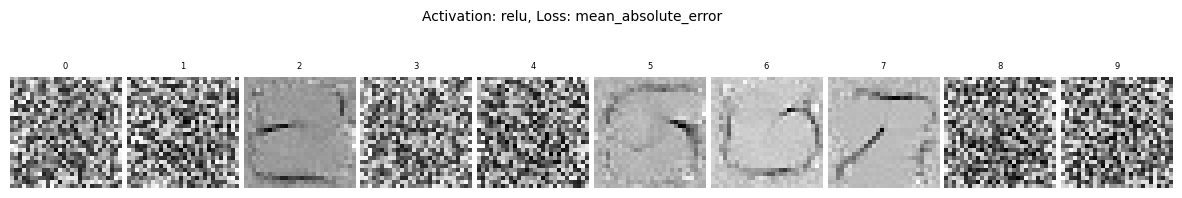





Training with activation=relu, loss=kld
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1397 - loss: 0.6900 - val_accuracy: 0.1348 - val_loss: 4.2096e-04
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1346 - loss: 2.9010e-04 - val_accuracy: 0.1257 - val_loss: 1.4827e-04
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1193 - loss: 3.9784e-05 - val_accuracy: 0.1156 - val_loss: 9.8561e-05
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1047 - loss: 5.7776e-07 - val_accuracy: 0.1084 - val_loss: 4.7700e-05
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0922 - loss: -2.2136e-06 - val_accuracy: 0.0928 - val_loss: 4.6506e-05
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0876 - loss: -1.3608e-05 - val_accuracy: 0.0903 - val_loss: 4.6413e-05
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0846 - loss: -1.2425e-05 - val_accuracy: 0.0895 - val_loss: 4.

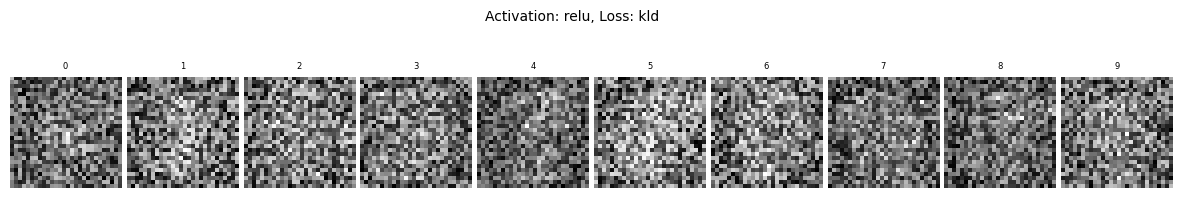





Training with activation=relu, loss=hinge
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3216 - loss: 0.9787 - val_accuracy: 0.3959 - val_loss: 0.9638
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3952 - loss: 0.9642 - val_accuracy: 0.4821 - val_loss: 0.9565
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5149 - loss: 0.9539 - val_accuracy: 0.6483 - val_loss: 0.9417
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6474 - loss: 0.9418 - val_accuracy: 0.6502 - val_loss: 0.9407
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6539 - loss: 0.9406 - val_accuracy: 0.6518 - val_loss: 0.9408
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6517 - loss: 0.9406 - val_accuracy: 0.6473 - val_loss: 0.9403
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6517 - loss: 0.9403 - val_accuracy: 0.6514 - val_loss: 0.9405
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s

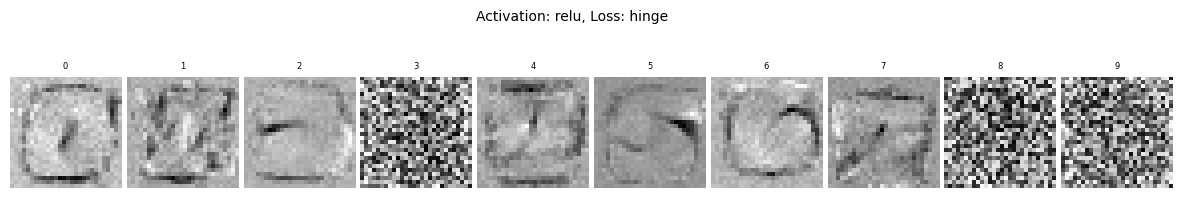





Training with activation=tanh, loss=mean_squared_error
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7384 - loss: 0.0639 - val_accuracy: 0.8460 - val_loss: 0.0446
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8325 - loss: 0.0442 - val_accuracy: 0.8391 - val_loss: 0.0432
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8314 - loss: 0.0438 - val_accuracy: 0.8418 - val_loss: 0.0441
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8316 - loss: 0.0436 - val_accuracy: 0.8355 - val_loss: 0.0437
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8345 - loss: 0.0433 - val_accuracy: 0.8403 - val_loss: 0.0438
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8322 - loss: 0.0435 - val_accuracy: 0.8228 - val_loss: 0.0456
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8292 - loss: 0.0436 - val_accuracy: 0.8343 - val_loss: 0.0434
Epoch 8/10
1875/1875 ━━━━━━━━━━

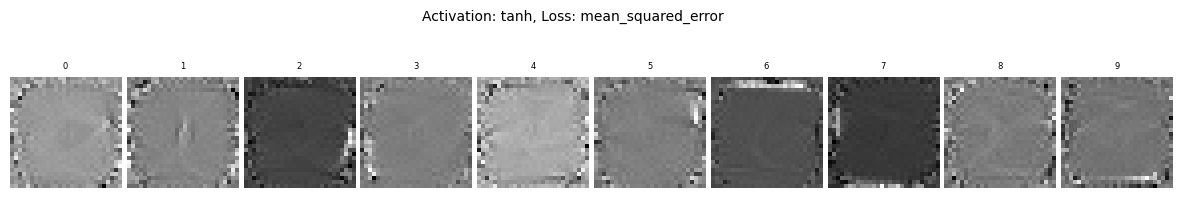





Training with activation=tanh, loss=categorical_crossentropy
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1226 - loss: 9.6055 - val_accuracy: 0.1051 - val_loss: 10.9234
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1288 - loss: 10.2718 - val_accuracy: 0.1989 - val_loss: 9.8889
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.2076 - loss: 9.2302 - val_accuracy: 0.3059 - val_loss: 10.2010
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2664 - loss: 9.6311 - val_accuracy: 0.2976 - val_loss: 9.7654
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2808 - loss: 9.3910 - val_accuracy: 0.2687 - val_loss: 9.9431
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2434 - loss: 9.7352 - val_accuracy: 0.2098 - val_loss: 9.9033
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2062 - loss: 9.1914 - val_accuracy: 0.2325 - val_loss: 8.4302
Epoch 8/10
1875/1875 ━

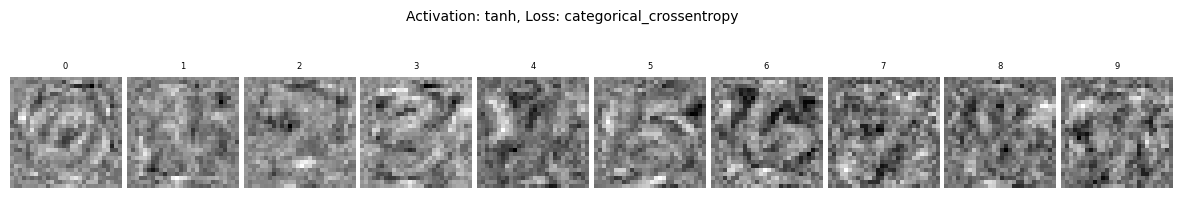





Training with activation=tanh, loss=mean_absolute_error
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6101 - loss: 0.1585 - val_accuracy: 0.6346 - val_loss: 0.1077
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6332 - loss: 0.1026 - val_accuracy: 0.6194 - val_loss: 0.0995
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6222 - loss: 0.0981 - val_accuracy: 0.5769 - val_loss: 0.0989
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6218 - loss: 0.0972 - val_accuracy: 0.6154 - val_loss: 0.0971
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6175 - loss: 0.0970 - val_accuracy: 0.6087 - val_loss: 0.0992
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6176 - loss: 0.0966 - val_accuracy: 0.6198 - val_loss: 0.0963
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6193 - loss: 0.0962 - val_accuracy: 0.5816 - val_loss: 0.0968
Epoch 8/10
1875/1875 ━━━━━━━━━

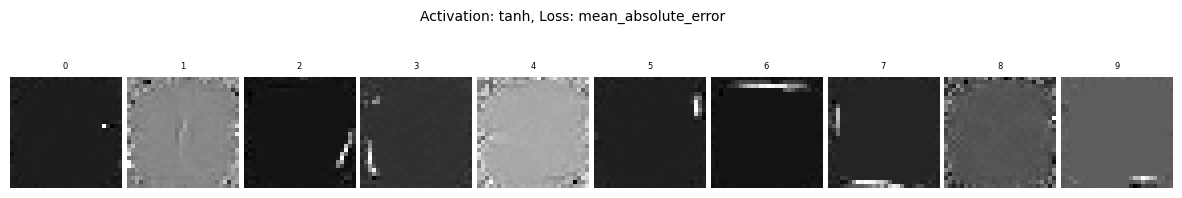





Training with activation=tanh, loss=kld
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1384 - loss: 0.3837 - val_accuracy: 0.1518 - val_loss: 0.0015
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1515 - loss: 0.0012 - val_accuracy: 0.1500 - val_loss: 4.2306e-04
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1504 - loss: 3.7388e-04 - val_accuracy: 0.1578 - val_loss: 1.5315e-04
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1616 - loss: 1.3892e-04 - val_accuracy: 0.1694 - val_loss: 5.5560e-05
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1742 - loss: 4.9123e-05 - val_accuracy: 0.1843 - val_loss: 1.6079e-05
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1898 - loss: 1.0980e-05 - val_accuracy: 0.1935 - val_loss: -9.0095e-07
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1979 - loss: -3.1581e-06 - val_accuracy: 0.2024 - val_loss: -8.3438e-06

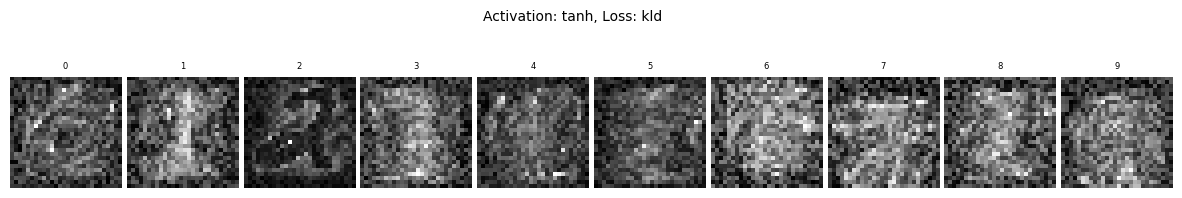





Training with activation=tanh, loss=hinge
Epoch 1/10
 215/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1621 - loss: 0.3245

KeyboardInterrupt: 

In [6]:


# Liste di combinazioni di funzioni di attivazione e perdita
activations = ['sigmoid', 'softmax', 'relu', 'tanh', 'linear']
losses = ['mean_squared_error', 'categorical_crossentropy', 'mean_absolute_error', 'kld', 'hinge']



# Iterazione su tutte le combinazioni di attivazione e funzione di perdita
for activation in activations:
    for loss in losses:
        print(f"\n\n\n\nTraining with activation={activation}, loss={loss}")

        # Creazione del modello
        model = Sequential([
            Flatten(input_shape=(28, 28)),
            Dense(10, activation=activation)
        ])

        # Compilazione del modello
        model.compile(
            optimizer='adam',
            loss=loss,
            metrics=['accuracy']
        )

        # Addestramento del modello
        model.fit(
            x_train, y_train,
            epochs=epochs,  # Ridotto a 5 epoche per velocità
            batch_size=32,
            verbose=1,  # Silenzia l'output di addestramento
            validation_data=(x_test, y_test)
        )

        # Visualizzazione dei pesi
        weights = model.layers[1].get_weights()[0]
        visualize_weights(weights, title=f"Activation: {activation}, Loss: {loss}")